
# Project: Investigating No-show Appointments Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Project Background:

This dataset contains information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. There are a number of characteristics about the patient are included in each row. Below are some important points regarding the data in the dataset:

- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

### Key Questions:

I will perform a series of data analysis on this dataframe to tackle the following main questions:
- What is the overall percentage of patients who showed up vs those who did not?.
- What are the key factors determining if a patient will show up for their scheduled appointment? such as: age, gender, alcoholism, sms recieved. 

In [1]:
# In this cell, i will import all the necessary packages that i will use to investigate this dataset.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

I will load my data into this notebook, then i will inspect my data to see all the data types and to look for instances of missing data. If it needs to be cleaned or modified and make the changes accordingly.

In [2]:
# Loading the data using pandas

df = pd.read_csv('noshow_appointments_2016.csv')

# Looking into sample of the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Checking to see how many rows and columns we have in this dataset

df.shape

(110527, 14)

In [4]:
# Checking the dataframe for any missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Checking the dataframe for the general statistical details

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# Checking for any duplicate values

df.duplicated().sum()

0

In [7]:
# Double checking if some the values we have actually make sense

df[df['Age'] <= 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


### General Properties Summary:

- We have 110527 different instances of appointments in this dataframe and for each of them, there is 14 attributes.
- There is no missing values in this set of data that i am working on.
- There is no duplicate values either and every row is a unique set of data
- We have multiple instances where the age is either in - or 0 which does not make sense.



## Data Cleaning



In this step, i will be making the necessary changes and adjustment to clean and modify my data.

### Spell Correction:

In [8]:
# Correcting the spelling and formats of the labels.

df.rename(columns= {'PatientId':'PatientID','Neighbourhood':'Neighborhood','Hipertension': 'Hypertension', 'Handcap':'Handicap', 'No-show':'No_show'}, inplace = True)

### Filling missing/ incorrect Values:

In [9]:
# Correcting the - and 0 ages using age mean

age = df['Age'].mean()
df[df['Age'] <= 0] = age

In [10]:
# Confirming if the age issue is fixed

df[df['Age'] <=0]

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


### Correcting Data Types:

In [11]:
# Assigning the data to the correct data type

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [12]:
# Confirming the changes to datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientID       110527 non-null  float64            
 1   AppointmentID   110527 non-null  float64            
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  float64            
 6   Neighborhood    110527 non-null  object             
 7   Scholarship     110527 non-null  float64            
 8   Hypertension    110527 non-null  float64            
 9   Diabetes        110527 non-null  float64            
 10  Alcoholism      110527 non-null  float64            
 11  Handicap        110527 non-null  float64            
 12  SMS_received    110527 non-null  float64            
 13  No_show       

### Removing Unnecessary Columns:

Below i am dropping all the columns which are not useful to answer my questions. Some of those columns are too general which cannot be used to establish a pattern, such as patient ID, so those are not useful for the purpose of my analysis; while others are relevant to the topic, but for the sake of this analysis i will only keep the columns which i will be using.

In [13]:
# Dropping the columns that i will not use for my analysis

df.drop(['PatientID','AppointmentID','ScheduledDay','AppointmentDay','Hypertension','Diabetes','Neighborhood', ], axis = 1, inplace = True)

### Manipulating the Incorrect Values:






Upon checking the unique data types in the No_show column, i realized there was a third data type which was not specified anywhere in the website. After doing my research, i came to the conclusion that it is incorrect data and with the following steps i removed them.

In [14]:
# Checking the unique values in No_show column

df.No_show.unique()

array(['No', 'Yes', 37.08887421173107], dtype=object)

In [15]:
# Checking the exact number for each value in the No_show column

df.No_show.value_counts()

No                   85307
Yes                  21680
37.08887421173107     3540
Name: No_show, dtype: int64

In [16]:
# Making a new list of the actual identified values that i want in the column.

df_values = ['No', 'Yes']

# Replacing the dataframe to represent the values i need for this project.

df = df[df.No_show.isin(df_values)]

In [17]:
# Confirming the changes took place

df.No_show.unique()

array(['No', 'Yes'], dtype=object)

## Cleaning Summary:

There was multiple errors and inconsistencies with our data which needed to be cleaned and modified in order to make the analyzing process simple and easy. Below are the cleaning we performed:

- Some of the label names were spelled incorrectly or had different formatting, so i corrected the spelling and changed them to matching format.
- In age column, we had some values which were either 0 or (-) which wouldn't make sense as such age does not exist, so i used the mean age to replace the incorrect values.
- The AppoitnmentDay and ScheduledDay columns datatype was object, so i changed them to datetime format to make it accurate. 
- Dropped the unnecessary columns and only kept the ones which are relevant to my topic.
- Removed the incorrect value from the No_show column since it was unidentified, assuming it was human errors.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What is the overall percentage of shows vs no shows?

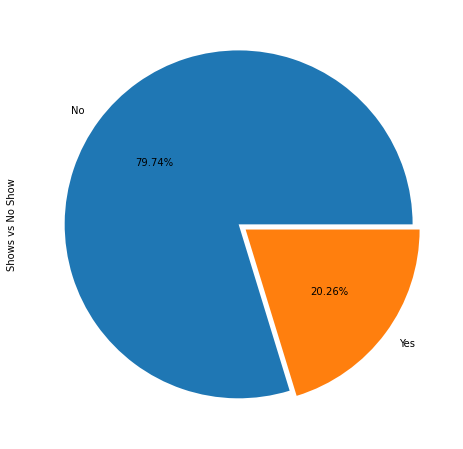

In [18]:
# Here i will plot a pie chart which will reflect the percentage of people who showed up vs those who did not.

df.No_show.value_counts().plot.pie(figsize=(8,8), autopct='%.2f%%', explode=(0, .05), label = 'Shows vs No Show')
plt.show()

### Question 1 conclusion:

The pie chart above indicated that around 20% of the people did not show up to their appointments, which is a huge. In the next few questions, i will dive deep to find people with which characteristics are likely to not show up to their appointment. 

### Research Question 2: What is the relationship between Age and No shows?

In [19]:
# Converting 'Yes' and 'No' values into integers

df.No_show = np.where(df.No_show == "Yes", 1, 0)

In [20]:
# Confirming the changes took place


df.No_show.value_counts()

0    85307
1    21680
Name: No_show, dtype: int64

In [21]:
# Creating masks for easy use of the different values in No_show column

showed_up = df.No_show == 0
no_show = df.No_show == 1

In [36]:
# Creating a function which will give us histograms for different parameters we put in

def make_hist(value):
    value[showed_up].hist(label = "Showed up")
    value[no_show].hist(label = "Didn't Show up")

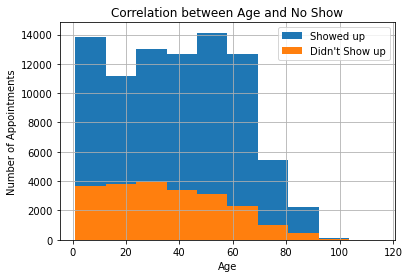

In [37]:
# Comparing the age of showed up and no shows using histograms.

make_hist(df.Age)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Number of Appointments')
plt.title('Correlation between Age and No Show');

### Question 2 conclusion:

Looking into the chart above, we can clearly see that the younger the age, the more likely they are to not show up to their appointment. People in age range (1-10) are almost equal to people in age range (50-60); however, we have many more people not showing up to their appointments in range (1-10) vs range (50-60). It is safe to say that younger people are more likly to not show up to their appointments.

### Research Question 3:  What is the relationship between Gender and No shows?

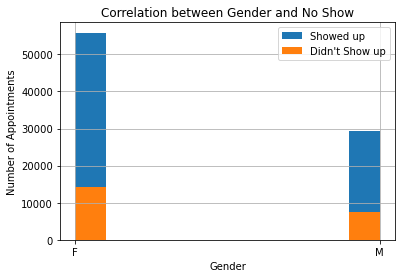

In [38]:
# Ploting the difference in no shows for different gender groups

make_hist(df.Gender)
plt.legend()
plt.xlabel('Gender')
plt.ylabel('Number of Appointments')
plt.title('Correlation between Gender and No Show');

### Question 3 conclusion:

According to the outcome of the chart above, it looks like females have a higher number of no shows compared to male patients; therefore, we can assume that the likelihood of female patients not showing up is much higher than that of the male patients.

### Research Question 4: Does getting SMS result in lesser No Shows?

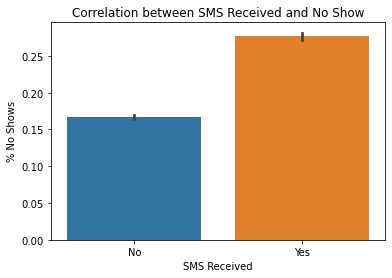

In [39]:
# Making a dictionary to changed 1 and 0 to Yes and No
yesno = {1:'Yes', 0:'No'}

# bar plot the percentage of noshows for each sms condition
ax = sns.barplot(x=df.SMS_received.map(yesno), y=df.No_show)
ax.set_ylabel('% No Shows')
ax.set_xlabel('SMS Received')
ax.set_title('Correlation between SMS Received and No Show')
plt.show();

### Question 4 conclusion:

The chart above indicates that the no show rate was higher in patients who recieved an SMS compared to those who did not. We can conclude that SMS notification will influence the outcome of a no show appointment.

## Limitations

While working on this analysis, there was several challenges and limitations that i had to address in order to get the outcome and result that i was looking for. The major limitations for me was that the dataset needed a lot of cleaning. There was some spelling mistakes and typos in column titles, some other data did not have the correct data tpye. The next major limitation was incorrect data values, for which i had to manipulate some part of it using the mean values from that column, some of them had to be dropped entirely.

<a id='conclusions'></a>
## Conclusions



The purpose of this analysis was to identify what are the key characteristics of the patients who will not show up to their scheduled appointment and what factors are useful in reducing the likelihood of no shows. After performing a series of data analysis and transforming the data into clear visuals using Matplotlib and Seaborn, i came up with the following conclusions:

- The overall percentage of patients who did not show up to their appointments is above 20%, which is a huge number and can cost the healthcare industry a lot of money and resources.
- Through my analysis, i found that age is one of the important factors in determining a no show. The data suggests, the younger a patient is, the more likely it is for them to not show up to the scheduled appointment.
- Another key factor in determining a no show was a patient's gender. according to the data, female patients are more likely to not show up to their appointment compared to male patients.
- Lastly, i looked into the data to see if sending a SMS notification will result in less no shows. I was expecting the no show rate to drop with the SMS sent; however, i found out that there was no significant impact of SMS on the outcome of no shows. The data suggests that there has been higher number of no shows in patients who got an SMS compared to those who did not reciece one. We can conclude that SMS will not influence the outcome of a no show appointment and is a waste of resources and time.